In [1]:
%matplotlib inline

In [2]:
import pandas as pd

dataOrigin = pd.read_csv("weatherHistory.csv")
dataOrigin.head()

,Formatted_Date,Summary,Precip_Type,Temperature(celsius),Apparent_Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
dataOrigin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted_Date                   96453 non-null object
Summary                          96453 non-null object
Precip_Type                      95936 non-null object
Temperature(celsius)             96453 non-null float64
Apparent_Temperature(celsius)    96453 non-null float64
Humidity                         96453 non-null float64
Wind_Speed(km/h)                 96453 non-null float64
Wind_Bearing(degrees)            96453 non-null int64
Visibility(km)                   96453 non-null float64
Loud_Cover                       96453 non-null int64
Pressure_(millibars)             96453 non-null float64
Daily_Summary                    96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [6]:
dataOrigin.Precip_Type.value_counts()

rain    85224
snow    10712
Name: Precip_Type, dtype: int64

In [7]:
dataOrigin.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [146]:
dataOrigin.Daily_Summary.value_counts()

Mostly cloudy throughout the day.                                                                                              20085
Partly cloudy throughout the day.                                                                                               9981
Partly cloudy until night.                                                                                                      6169
Partly cloudy starting in the morning.                                                                                          5184
Foggy in the morning.                                                                                                           4201
Foggy starting overnight continuing until morning.                                                                              3576
Partly cloudy until evening.                                                                                                    3288
Mostly cloudy until night.                                           

In [8]:
dataOrigin.describe()

,Temperature(celsius),Apparent_Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud_Cover,Pressure_(millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


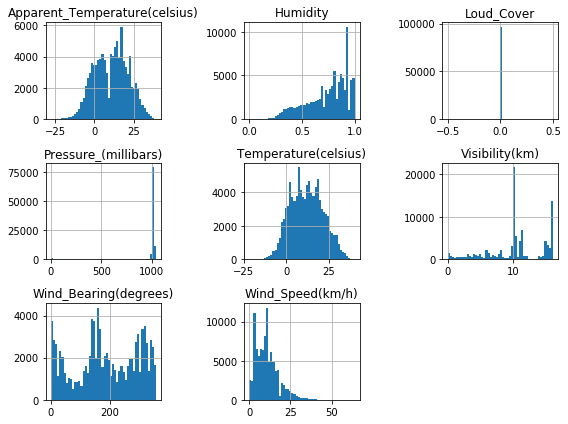

In [9]:
import matplotlib.pyplot as plt
dataOrigin.hist(bins=50, figsize=(8,6))
plt.tight_layout()
plt.show()

Create test set

In [147]:
data = dataOrigin.drop(["Formatted_Date","Precip_Type","Loud_Cover", "Summary"], axis=1)
data.head()

,Temperature(celsius),Apparent_Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure_(millibars),Daily_Summary
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [148]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(data),len(train_set),len(test_set)))



data has 96453 instances
 77162 train instances
 19291 test intances


In [149]:
train = train_set.copy()

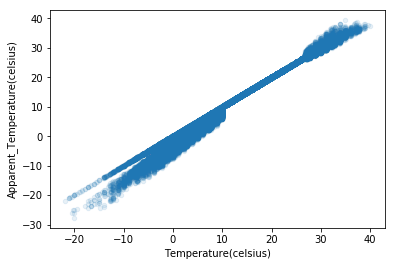

In [150]:
train.plot(kind="scatter", x="Temperature(celsius)", y="Apparent_Temperature(celsius)", alpha=0.1)

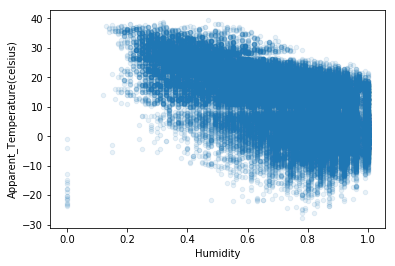

In [151]:
train.plot(kind="scatter", x="Humidity", y="Apparent_Temperature(celsius)", alpha=0.1)

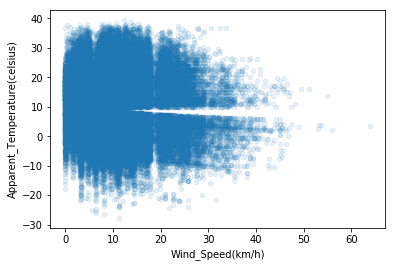

In [152]:
train.plot(kind="scatter", x="Wind_Speed(km/h)", y="Apparent_Temperature(celsius)", alpha=0.1)

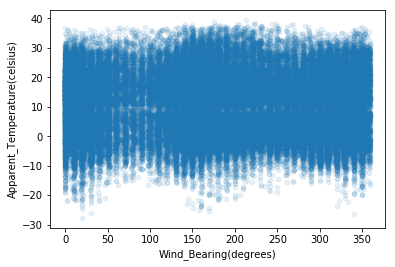

In [153]:
train.plot(kind="scatter", x="Wind_Bearing(degrees)", y="Apparent_Temperature(celsius)", alpha=0.1)

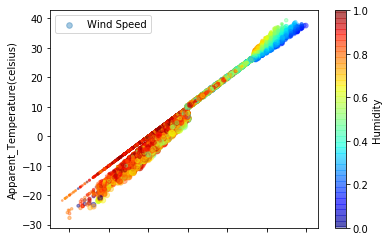

In [154]:
train.plot(kind="scatter", x="Temperature(celsius)", y="Apparent_Temperature(celsius)", alpha=0.4,
           s=train["Wind_Speed(km/h)"], label="Wind Speed",
           c="Humidity", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()

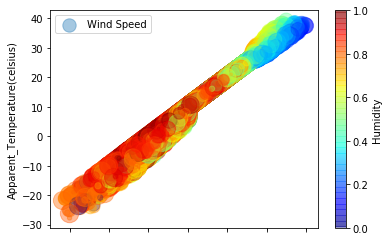

In [155]:
train.plot(kind="scatter", x="Temperature(celsius)", y="Apparent_Temperature(celsius)", alpha=0.4,
           s=train["Wind_Bearing(degrees)"], label="Wind Speed",
           c="Humidity", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()

Look for correlations

In [156]:
corr_matrix = train.corr()
corr_matrix["Apparent_Temperature(celsius)"].sort_values(ascending=False)

Apparent_Temperature(celsius)    1.000000
Temperature(celsius)             0.992605
Visibility(km)                   0.380978
Wind_Bearing(degrees)            0.026186
Pressure_(millibars)             0.000173
Wind_Speed(km/h)                -0.057463
Humidity                        -0.603477
Name: Apparent_Temperature(celsius), dtype: float64

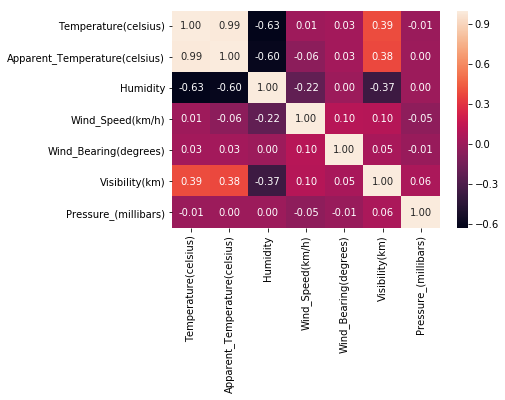

In [157]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")

In [158]:
# attribute combinations
#train["wind_chill_index"] = (10*np.sqrt((train["Wind_Speed(km/h)"]/3.6)) - (train["Wind_Speed(km/h)"]/3.6) + 10.5)*(33 - train["Temperature(celsius)"])
train["wind_chill_index"] = 13.12 + 0.6215*train["Temperature(celsius)"] - 11.37*(train["Wind_Speed(km/h)"]**0.16) + 0.3965*train["Temperature(celsius)"]*(train["Wind_Speed(km/h)"]**0.16)
train["relative_temperature"] = train["Humidity"]*train["Temperature(celsius)"]

In [159]:
train_correlation_matrix = train.corr()
train_correlation_matrix["Apparent_Temperature(celsius)"].sort_values(ascending=False)

Apparent_Temperature(celsius)    1.000000
Temperature(celsius)             0.992605
wind_chill_index                 0.991525
relative_temperature             0.858144
Visibility(km)                   0.380978
Wind_Bearing(degrees)            0.026186
Pressure_(millibars)             0.000173
Wind_Speed(km/h)                -0.057463
Humidity                        -0.603477
Name: Apparent_Temperature(celsius), dtype: float64

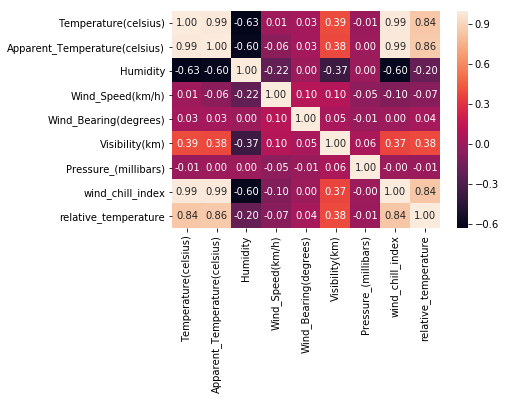

In [160]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")

Prepare data for algorothm

In [161]:
# just to remind ...
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=35)

# drop creates a copy of the remain data and does not affect train_set
train_X = train_set.drop("Apparent_Temperature(celsius)", axis=1)

# copy the label (y) from train_set
train_y = train_set["Apparent_Temperature(celsius)"].copy()

In [162]:
train_X.isnull().sum()

Temperature(celsius)     0
Humidity                 0
Wind_Speed(km/h)         0
Wind_Bearing(degrees)    0
Visibility(km)           0
Pressure_(millibars)     0
Daily_Summary            0
dtype: int64

porém precip_type é categorica e não influencia na temperatura ambiente

In [163]:
#train_X = train_X.drop(["Formatted_Date","Precip_Type","Loud_Cover", "Daily_Summary"], axis=1)
train_X.head()


,Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure_(millibars),Daily_Summary
43345,15.438889,0.96,10.8675,0,5.1359,1014.97,Mostly cloudy throughout the day.
66832,6.027778,0.67,33.5041,302,11.3988,1010.07,Breezy until evening and foggy in the morning.
92142,18.238889,0.97,5.7316,262,14.6832,1010.24,Mostly cloudy throughout the day.
24092,10.227778,0.66,3.2200,310,9.9820,1018.47,Partly cloudy starting in the morning continui...
35372,7.950000,0.76,14.0070,300,9.9820,1016.88,Mostly cloudy starting overnight.


In [33]:
#train_X.isnull().sum()

In [165]:
train_X.Daily_Summary.head(10)

43345                    Mostly cloudy throughout the day.
66832       Breezy until evening and foggy in the morning.
92142                    Mostly cloudy throughout the day.
24092    Partly cloudy starting in the morning continui...
35372                    Mostly cloudy starting overnight.
42206                                Foggy in the morning.
16880                           Mostly cloudy until night.
71039                    Partly cloudy throughout the day.
1763                            Mostly cloudy until night.
72874                         Partly cloudy until morning.
Name: Daily_Summary, dtype: object

In [166]:
# For this, we can use Pandas' factorize() method which maps each 
# category to a different integer:

train_X_cat_encoded, train_X_categories = train_X.Daily_Summary.factorize()

# train_X_cat_encoded is now purely numerical
train_X_cat_encoded[0:10]

array([0, 1, 0, 2, 3, 4, 5, 6, 5, 7])

In [167]:
# factorize() method also return the list of categories
train_X_categories

Index(['Mostly cloudy throughout the day.',
       'Breezy until evening and foggy in the morning.',
       'Partly cloudy starting in the morning continuing until night.',
       'Mostly cloudy starting overnight.', 'Foggy in the morning.',
       'Mostly cloudy until night.', 'Partly cloudy throughout the day.',
       'Partly cloudy until morning.',
       'Mostly cloudy starting in the morning continuing until night.',
       'Foggy starting overnight continuing until morning.',
       ...
       'Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.',
       'Breezy and mostly cloudy overnight.',
       'Mostly cloudy until night and windy starting in the morning continuing until afternoon.',
       'Light rain starting overnight.',
       'Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.',
       'Partly cloudy throughout the day and breezy starting in the 

In [168]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder(sparse=False)

# Numpy's reshape() allows one dimension to be -1, which means "unspecified":
# the value is inferred from the lenght of the array and the remaining
# dimensions
train_X_cat_1hot = encoder.fit_transform(train_X_cat_encoded.reshape(-1,1))

# it is a column vector
train_X_cat_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [169]:
train_X_cat_1hot.shape

(77162, 214)

In [170]:
import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

# indices for the columns
temp_ix, hum_ix, wind_speed_ix = 1, 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        #self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        
        return self # nothing else to do
  
    def transform(self, X, y=None):
    
        wind_chill_index = 13.12 + 0.6215*X[:, temp_ix] - 11.37*(X[:,wind_speed_ix]**0.16) + 0.3965*X[:,temp_ix]*(X[:,wind_speed_ix]**0.16)
        #train["wind_chill_index"] = 13.12 + 0.6215*train["Temperature(celsius)"] - 11.37*(train["Wind_Speed(km/h)"]**0.16) + 0.3965*train["Temperature(celsius)"]*(train["Wind_Speed(km/h)"]**0.16)
        relative_temperature = X[:,hum_ix]*X[:,temp_ix]
        #train["relative_temperature"] = train["Humidity"]*train["Temperature(celsius)"]
        #rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        #population_per_household = X[:, population_ix] / X[:, household_ix]
        return np.c_[X, wind_chill_index, relative_temperature]
        #if self.add_bedrooms_per_room:
        #  bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        # Translates slice objects to concatenation along the second axis.
        #  return np.c_[X, rooms_per_household, 
        #               population_per_household, 
        #               bedrooms_per_room]
        #else:
        #  return np.c_[X, rooms_per_household, population_per_household]

In [171]:
# attribute combinations
#train["wind_chill_index"] = (10*np.sqrt((train["Wind_Speed(km/h)"]/3.6)) - (train["Wind_Speed(km/h)"]/3.6) + 10.5)*(33 - train["Temperature(celsius)"])
#train_X["wind_chill_index"] = 13.12 + 0.6215*train_X["Temperature(celsius)"] - 11.37*(train_X["Wind_Speed(km/h)"]**0.16) + 0.3965*train_X["Temperature(celsius)"]*(train_X["Wind_Speed(km/h)"]**0.16)
#train_X["relative_temperature"] = train_X["Humidity"]*train_X["Temperature(celsius)"]

In [172]:
attr_adder = CombinedAttributesAdder()
train_X_extra_attribs = attr_adder.transform(train_X.values)

# train_X_extra_attribs is a numpy array
# transforming it to a dataframe for better visualization
train_X_extra_attribs_df = pd.DataFrame(
    train_X_extra_attribs,
    columns=list(train_X.columns)+["wind_chill_index", 
                                   "relative_temperature"]
                          )

train_X_extra_attribs_df.head()

,Temperature(celsius),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure_(millibars),Daily_Summary,wind_chill_index,relative_temperature
0,15.4389,0.96,10.8675,0,5.1359,1014.97,Mostly cloudy throughout the day.,13.7166,10.4328
1,6.02778,0.67,33.5041,302,11.3988,1010.07,Breezy until evening and foggy in the morning.,-14.1518,22.4477
2,18.2389,0.97,5.7316,262,14.6832,1010.24,Mostly cloudy throughout the day.,-13.053,5.55965
3,10.2278,0.66,3.22,310,9.982,1018.47,Partly cloudy starting in the morning continui...,-14.284,2.1252
4,7.95,0.76,14.007,300,9.982,1016.88,Mostly cloudy starting overnight.,-13.9775,10.6453


In [173]:
from sklearn.base import BaseEstimator, TransformerMixin

# This class will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values



In [174]:
train_X_num = train_X.drop("Daily_Summary", axis=1)
#train_X_prepared = train_X.copy()


In [175]:
#Used to join two or more pipelines into a single pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

# https://github.com/scikit-learn/scikit-learn/issues/10521
from future_encoders import OneHotEncoder

# numerical columns 
num_attribs = list(train_X_num.columns)

# categorical columns
cat_attribs = ["Daily_Summary"]

# pipeline for numerical columns
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])

# pipeline for categorical column
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

# a full pipeline handling both numerical and categorical attributes
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

In [176]:
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared

array([[ 3.66320707e-01,  1.15311427e+00,  7.33102409e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.20240760e-01, -3.31278535e-01,  3.27559208e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.59843127e-01,  1.20430023e+00, -7.34187664e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.71974079e-01,  3.85324889e-01,  9.65553409e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.56519162e-01,  4.36510848e-01, -1.45013674e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.27982124e-01,  8.45998519e-01,  3.57494105e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [177]:
train_X_prepared.shape

(77162, 222)

In [132]:
#train_X_prepared["Summary"] = train_X_cat_1hot
#train_X_prepared.head()

In [178]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
# Done!! You now have a working Linear Regression Model.
# Let's try it out on a few instances from the trainning set.

some_data = train_X.iloc[:5]
some_labels = train_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# make predictons
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [14.82154658  1.46578089 19.14428369  9.29496086  6.09425865]


In [180]:
# Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [15.438888888900001, 1.1333333333, 18.2388888889, 10.2277777778, 5.5388888889]


In [181]:
from sklearn.metrics import mean_squared_error

apparent_temperature = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y, apparent_temperature)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.9627868246173136

In [182]:
#from sklearn.tree import DecisionTreeRegressor

#tree_reg = DecisionTreeRegressor()
#tree_reg.fit(train_X_prepared, train_y)

In [183]:
#aparrent_temperature = tree_reg.predict(some_data_prepared)
#tree_mse = mean_squared_error(some_labels, apparent_temperature)
#tree_rmse = np.sqrt(tree_mse)
#tree_rmse

In [184]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [185]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, 
                             train_X_prepared, 
                             train_y,
                             scoring="neg_mean_squared_error", 
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.97494355 0.95007476 0.96673503 0.97288669 0.97466993 0.95855938
 0.96388095 0.96510587 0.96305677 0.96974045]
Mean: 0.9659653379392434
Standard deviation: 0.007348667507449915


Present solution

In [186]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
# predictors and label
test_X = test_set.drop("Apparent_Temperature(celsius)", axis=1)
test_y = test_set["Apparent_Temperature(celsius)"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)


final_predictions = lin_reg.predict(test_X_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.9612067345898803


Muitas opções de valroes categoricos para pouco data test, logo vai faltar valores categoricos não mapeados

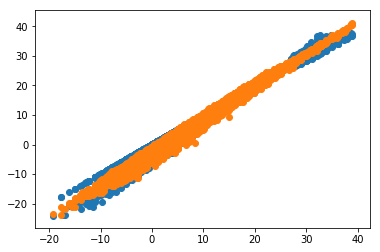

In [190]:
import matplotlib.pyplot as plt

plt.scatter(test_X["Temperature(celsius)"].values, test_y)
plt.scatter(test_X["Temperature(celsius)"].values, final_predictions)

In [143]:
#train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

#train_X = train_set.drop("Apparent_Temperature(celsius)", axis=1)

#train_y = train_set["Apparent_Temperature(celsius)"].copy()

#test_X = test_set.drop("Apparent_Temperature(celsius)", axis=1)
#test_y = test_set["Apparent_Temperature(celsius)"].copy()

In [188]:
#train_X_prepared = full_pipeline.fit_transform(train_X)
#train_X_prepared

#lin_reg = LinearRegression()

#lin_reg.fit(train_X_prepared, train_y)

In [189]:
#test_X_prepared = full_pipeline.transform(test_X)


#final_predictions = lin_reg.predict(test_X_prepared)
#final_mse = mean_squared_error(test_y, final_predictions)
#final_rmse = np.sqrt(final_mse)
#print(final_rmse)